# 1. 강의영상 

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-wMY2MS-ZGKFXqVgbTeAzNQ&si=iojT6Aif9fwoOyUN >}}

# 2. Imports 

In [540]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3. 오브젝트

> "파이썬의 모든 것은 오브젝트이다. 값도, 함수도, 인스턴스도, 클래스도 오브젝트이다." <-- 살짝 과장이지만 일단 명언처럼 외우세여

## A. 오브젝트 

> 오브젝트 특징: `id(오브젝트)` 가 동작함 

In [596]:
a = 1 
id(a)

139673054200048

In [597]:
f = lambda x: x
id(f)

139671492666720

In [599]:
a = RPS(['가위'])
id(a)

139671501410208

In [600]:
id(RPS)

48527600

In [601]:
id(list)

7629888

In [604]:
id(range)

7611936

In [605]:
id(len)

139673054827024

In [607]:
id(id)

139673054826544

`-` 모듈 

In [618]:
id(np)

139672692083184

In [621]:
id(pd)

139672945002192

## B. 오브젝트가 아님 

`-` 구문

In [630]:
id(lambda)

SyntaxError: invalid syntax (3978401784.py, line 1)

In [631]:
id(def)

SyntaxError: invalid syntax (839197359.py, line 1)

`-` 제어구조

In [623]:
id(for)

SyntaxError: invalid syntax (1172573452.py, line 1)

In [624]:
id(if)

SyntaxError: invalid syntax (2846441332.py, line 1)

In [632]:
id(while)

SyntaxError: invalid syntax (2390637289.py, line 1)

# 4. `__call__` $(\star\star\star)$

## A. 함수도 인스턴스다

`-` 다시 함수를 공부해봅시다.

In [489]:
def f(x):
    return x+1

In [490]:
f(3)

4

`-` 함수의 사용방법?

- 입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음.
- 출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴.

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를 출력한다.

`-` 함수의 자료형?

In [491]:
?f

Signature: f(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_789918/1304018138.py
Type:      function

- type이 function이다.
- f는 function class의 instance이다.
- 결국 f 역시 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. -> 함수의 입력으로 함수를 쓸 수도 있고 함수의 출력으로 함수가 나올 수도 있다.

## B. 함수사용 고급

(예제1) 숫자입력, 함수출력

In [492]:
def f(a):
    def _f(x):
        return (x-a)**2
    return _f

In [493]:
g=f(10) # g(x)=(x-10)**2

In [494]:
g(2) # (2-10)**2 = 64

64

- 해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$라는 함수를 리턴해주는 함수

> 아니 무슨 함수를 "값처럼" 취급해서 리턴하네??

(예제1)의 다른표현: 익명함수 lambda

In [517]:
def f(x):
    return x+1

In [518]:
f= lambda x: x+1

표현1

In [519]:
def f(a):
    _f = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f 로 저장됨
    return _f

In [520]:
g=f(10) # g(x)=(x-10)**2

In [521]:
g(3) # (3-10)**2 = 49

49

표현2

In [522]:
def f(a):
    return lambda x: (x-a)**2

In [523]:
g=f(10) # g(x)=(x-10)**2

In [524]:
g(3) # (3-10)**2 = 49

49

(예제2) 함수입력, 숫자출력

In [531]:
f = lambda x: x**2

In [532]:
def d(f,x): # 함수를 입력을 받는 함수를 정의
    h=0.000000000001
    return (f(x+h)-f(x))/h

In [533]:
d(f,4) # f'(4) = 2*4 = 8

8.000711204658728

(예제3) 함수입력, 함수출력

In [546]:
def f(x):
    return x**2

In [547]:
def derivate(f):
    # step1: 함수오브젝트 f는 입력으로 받은상태
    # step2: 함수오브젝트 f를 이용하여 df라는 함수를 정의
    def df(x):
        h=0.000000000001
        return (f(x+h)-f(x))/h
    # step3: 정의된 df를 리턴
    return df

In [548]:
ff = derivate(f)

In [549]:
ff(7) # f의 도함수

14.004797321831575

**원래함수 시각화**

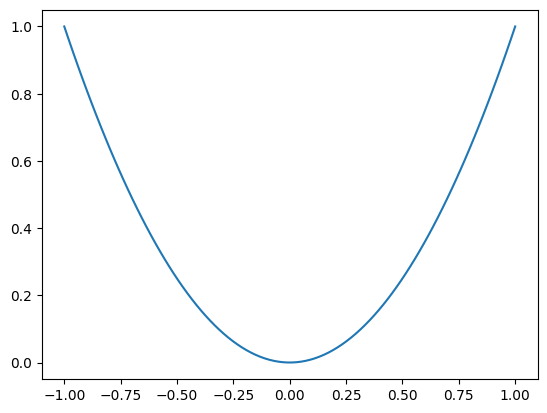

In [550]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

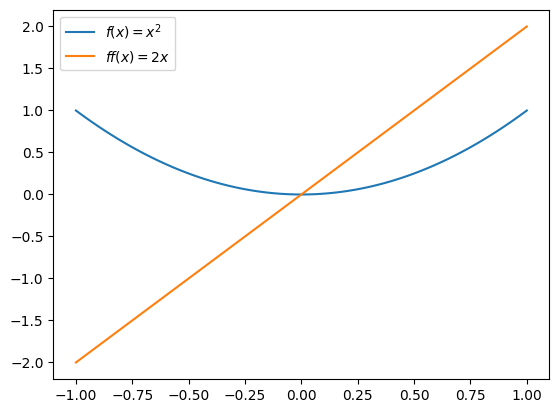

In [551]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제3)의 다른표현

In [552]:
def f(x):
    return x**2

In [553]:
def derivate(f):
    h=0.000000000001
    return lambda x: (f(x+h)-f(x))/h

In [554]:
ff = derivate(f)

In [555]:
ff(10)

20.00888343900442

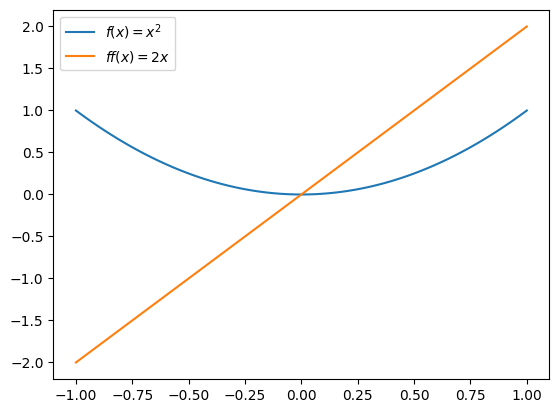

In [556]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제4) 함수들의 리스트

In [557]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3]
flst

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [558]:
for f in flst:
    print(f(2))

2
4
8


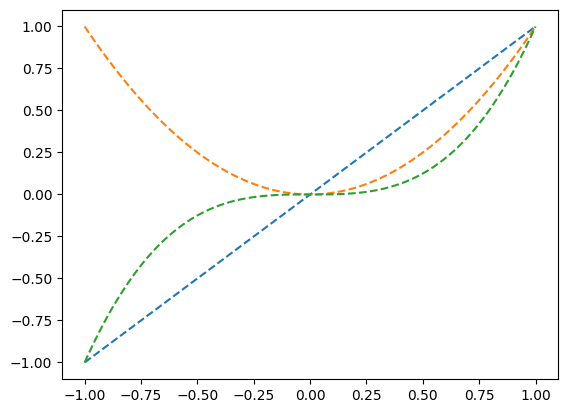

In [559]:
for f in flst:
    plt.plot(x,f(x),'--')

위의코드는 아래와 같음

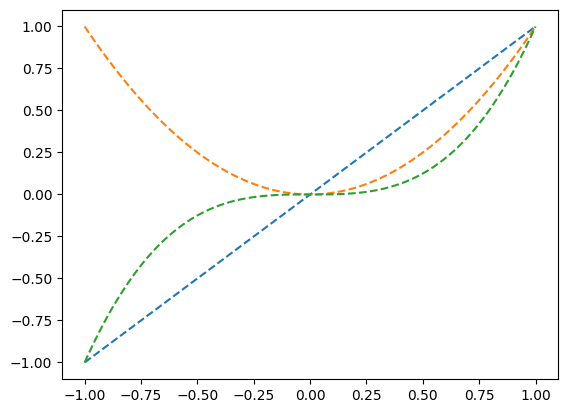

In [560]:
plt.plot(x,(lambda x: x)(x),'--')
plt.plot(x,(lambda x: x**2)(x),'--')
plt.plot(x,(lambda x: x**3)(x),'--')

## C. 정리

`-` 지금까지 개념

- 함수: 변수를 입력으로 받아서 변수를 출력하는 개념
- 변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로 사용함

`-` R과 구별되는 파이썬의 독특한 테크닉 (부제: 파이썬에서 함수를 잘 쓰려면?)

- 변수든 함수이든 둘다 인스턴스임. (즉 어떠한 클래스에서 찍힌 똑같은 오브젝트라는 의미)
- 변수를 함수처럼: 메소드 `lst.append(1)`은 마치 `append(lst,1)`와 같은 함수로 쓸 수 있음
- 함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로 쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도 있다.

## D. callable object

`-` 함수 오브젝트의 비밀?

In [561]:
f = lambda x: x+1

In [562]:
a=11

In [563]:
set(dir(f)) & {'__call__'}

{'__call__'}

- 함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [564]:
f.__call__(3) # f(3)

4

In [565]:
f.__call__(4) # f(4)

5

- 여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [566]:
class Klass:
    def __init__(self):
        self.name='guebin'

In [567]:
a=Klass()

In [568]:
a()

TypeError: 'Klass' object is not callable

- a는 callable이 아니라고 한다.

In [569]:
class Klass2(Klass):
    def __call__(self):
        print(self.name)

In [570]:
b=Klass2()

In [571]:
b()

guebin


- b는 callable object! 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
- Klass는 callable object를 만들지 못하지만 Klass2는 callable object를 만든다.

`-` 클래스로 함수를 만들기 (=함수인스턴스를 찍어내는 클래스 설계)

In [572]:
class AddConstant:
    def __init__(self,const):
        self.const = const
    def __call__(self,x):
        return x + self.const

In [573]:
f = AddConstant(3) # callable object생성, f.const에는 3이 저장되어있음.

In [574]:
f(5) # f.const 와 5를 더하는 기능을 수행, # 즉 f(x) = x+3 을 수행함

8

In [575]:
f(10)

13

`-` 클래스도 그러고 보니까 `오브젝트` 아니었나?

In [576]:
Student_Ver2?

Init signature: Student_Ver2(age=20.0, semester=0)
Docstring:      <no docstring>
Type:           type
Subclasses:     

- 이것도 type 이라는 또 다른 클래스에서 (클래스를 찍는 클래스) 찍힌 오브젝트이구나..

`-` 클래스 "오브젝트"도 함수 "오브젝트"처럼 `Student_Ver2()`와 같이 사용하면 인스턴스를 만들었음. -> `Student_Ver2.__call__()` 은 `Student_Ver2()`와 같은 역할을 할 것이다.

***일반적인 구현에서 "클래스 $\to$ 인스턴스" 과정***

In [ ]:
boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [ ]:
boram + '등록' + '휴학' + '휴학'

***공부를 위해 call을 이용해본 "클래스 $\to$ 인스턴스" 과정***

In [ ]:
boram = Student_Ver2.__call__(age=20.0,semester=0) #
# boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [ ]:
boram + '등록' + '휴학' + '휴학'

> 파이썬의 비밀11: `f()`와 같이 쓸 수 있는 오브젝트는 단지 `__call__` 이 정의되어있는 오브젝트일 뿐이다.

# 5. `__iter__` ($\star\star\star\star\star$)

## A. for문의 복습

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자.

(예제1) [1,2,3,4]

In [ ]:
for i in [1,2,33,4]:
    print(i)

1
2
33
4


(예제2) (1,2,3,4)

In [ ]:
for i in (1,2,33,4):
    print(i)

1
2
33
4


(예제3) '1234'

In [ ]:
for i in '123asdf':
    print(i)

1
2
3
a
s
d
f


(예제4) 5

In [ ]:
for i in 5:
    print(i)

TypeError: 'int' object is not iterable

`-` 의문1:

```python
for i in ???:
    print(i)
```

에서 ??? 자리에 올수 있는 것이 무엇일까?

(예제5) [[1,2,3,4],[3,4,5,6]], pd.DataFrame([[1,2,3,4],[3,4,5,6]])

In [ ]:
lst = [[1,2,3,4],[3,4,5,6]]
lst

[[1, 2, 3, 4], [3, 4, 5, 6]]

In [ ]:
for l in lst:
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]


In [ ]:
for l in np.array(lst):
    print(l)

[1 2 3 4]
[3 4 5 6]


In [ ]:
for l in pd.DataFrame(lst):
    print(l)

0
1
2
3


`-` 데이터프레임인 경우는 colname이 반복

In [ ]:
df = pd.DataFrame({'x':[1,2,3],'y':[2,3,4]})
df

,x,y
0,1,2
1,2,3
2,3,4


In [ ]:
for d in df:
    print(d)

x
y


`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

## B. for문의 동작원리

`-` 의문1의 해결: 아래의 ??? 자리에 올 수 있는 것은 dir()하여 `__iter__`가 있는 object이다.

```python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다.

`-` 예제1~4 확인

In [ ]:
lst = [1,2,3]
set(dir(lst)) & {'__iter__'}

{'__iter__'}

In [ ]:
tpl = 1,2,3
set(dir(tpl)) & {'__iter__'}

{'__iter__'}

In [ ]:
string = '123'
set(dir(string)) & {'__iter__'}

{'__iter__'}

In [ ]:
a = 5
set(dir(a)) & {'__iter__'}

set()

`-` `__iter__`의 역할: iterable object를 iterator로 만들 수 있다!

In [ ]:
lst = [1,22,-33]

In [ ]:
lst_iterator = lst.__iter__()
# lst_iterator = iter(lst)

`-` iterator가 되면 무엇이 좋은가? -> 숨겨진 기능 `__next__`가 열린다.

In [ ]:
set(dir(lst_iterator)) & {'__next__'}

{'__next__'}

`-` 그래서 `__next__`의 기능은? -> 원소를 차례대로 꺼내준다 + 더 이상 꺼낼 원소가 없으면 StopIteration Error를 발생시킨다.

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

1

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

22

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

-33

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

StopIteration: 

`-` for문의 동작원리

```python
for i in iterable:
    ...
```

1. 이터레이터생성: `.__iter__()` 혹은 `iter()`을 이용하여 iterable을 iterator로 만든다.

2. $i$생성 및 반복: 1에서 만들어진 iterator에서 `.__next__()`함수를 호출하고 결과를 $i$에 저장한뒤 for문 블락안의 내용 (들여쓰기 된 내용) 을 실행한다. $\to$ 반복한다.

3. 정지: `.__next__()`함수를 호출할때 StopIteration Error가 나오면 for문을 멈춘다.

```{mermaid}

flowchart LR
  A[iterable] --> |"__iter__()"| B(iterator)
  B --> |"__next__()"| C{stop?}
  C --> |NO| D[i] --> E[...] --> B
  C --> |YES| F[end]
```

`-` 아래의 구조도 잘 돌아갈까?

```python
for i in iterator:
    print(i)
```

> iterator의 iter가 자기자신을 리턴하도록 하는 트릭을 쓰면 "1.이터레이터생성 2.$i$생성 및 반복 3.정지"의 동작원리를 수정하지 않고 for문을 안전하게 돌릴 수 있다.

```{mermaid}

flowchart LR
  A(iterator) --> |"__iter__()"| B(iterator)
  B --> |"__next__()"| C{stop?}
  C --> |NO| D[i] --> E[...] --> B
  C --> |YES| F[end]
```

`-` 요약

- iterable object는 숨겨진 기능으로 `__iter__`를 가진다.
- iterator는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. 따라서 정의상 iterator는 그 자체로 iterable object가 된다!
- iterator의 `__iter__`는 자기자신을 리턴한다.

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를 만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다.

In [ ]:
_df_itertor = iter(df)

In [ ]:
next(_df_itertor)

'x'

In [ ]:
next(_df_itertor)

'y'

In [ ]:
next(_df_itertor)

StopIteration: 

## C. 사용자정의 이터레이터

`-` 내가 이터레이터를 만들어보자.

`-` 찌를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자.

In [ ]:
class RPS_ITERATOR: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self):
        self.candidate = ["묵","찌","빠"]
    def __iter__(self):
        return self
    def __next__(self):
        action = np.random.choice(self.candidate)
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [ ]:
a = RPS_ITERATOR()

In [ ]:
a.__next__()

'빠'

In [ ]:
a.__next__()

'묵'

In [ ]:
a.__next__()

'묵'

In [ ]:
a.__next__()

찌가 나와서 for문을 멈춥니다


StopIteration: 

In [ ]:
for i in a:
    print(i)

빠
묵
묵
빠
빠
찌가 나와서 for문을 멈춥니다


## D. range()

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [ ]:
for i in range(5):
    print(i)

0
1
2
3
4


- range(5)가 도데체 무엇이길래?

`-` `range(5)`의 정체는 그냥 iterable object이다.

In [ ]:
set(dir(range(5))) & {'__iter__','__next__'}

{'__iter__'}

`-` 그래서 언제든지 iterator로 바꿀 수 있다.

In [ ]:
rtor= iter(range(5))
rtor

In [ ]:
set(dir(rtor)) &  {'__iter__','__next__'}

{'__iter__', '__next__'}

`-` for문에서 range(5)가 행동하는 방법?

In [ ]:
rtor = iter(range(5))

In [ ]:
rtor.__next__()

0

In [ ]:
rtor.__next__()

1

In [ ]:
rtor.__next__()

2

In [ ]:
rtor.__next__()

3

In [ ]:
rtor.__next__()

4

In [ ]:
rtor.__next__()

StopIteration: 

## E. zip

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [ ]:
for i,j in zip([1,2,3],'abc'):
    print(i,j)

1 a
2 b
3 c


- zip은 뭐지?

In [ ]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ????`: 의 ???? 자리는 iterable object의 자리이다.

In [ ]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__','__next__'}

{'__iter__', '__next__'}

- `__next__()`함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그자체로 iterator 였다!

In [ ]:
z= zip([1,2,3],'abc')

In [ ]:
z.__next__()

(1, 'a')

In [ ]:
z.__next__()

(2, 'b')

In [ ]:
z.__next__()

(3, 'c')

In [ ]:
z.__next__()

StopIteration: 

***또다른 이해: 그러고보니까 `zip([1,2,3],'abc')`은 뭐하는 문법이지?***

In [ ]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables) --> A zip object yielding tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.
Type:           type
Subclasses:     

- 너 클래스였어?

In [ ]:
iterator_from_zip = zip.__call__([1,2,3],'abc')

In [ ]:
for i,j in iterator_from_zip:
    print(i,j)

1 a
2 b
3 c


> 파이썬의 작은 비밀: zip은 iterator를 찍어내는 클래스이다.

## F. enumerate

`-` zip의 짝궁으로 enumerate가 있음

In [ ]:
for i,s in enumerate('abc'):
    print(i,s)

0 a
1 b
2 c


`-` `enumerate('abc')`도 문법상 iterable object 아니면 iterator 임.

In [ ]:
set(dir(enumerate('abc'))) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

- iterator 였군

In [ ]:
iterator = enumerate('abc')

In [ ]:
next(iterator)

(0, 'a')

In [ ]:
next(iterator)

(1, 'b')

In [ ]:
next(iterator)

(2, 'c')

In [ ]:
next(iterator)

StopIteration: 

`-` 참고: enumerate 는 클래스임

In [ ]:
enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     

> 파이썬의 비밀: enumerate 역시 iterator를 찍어내는 클래스다.

> 파이썬의 비밀: iterator나 iterable object만 for문과 함께 사용할 수 있다.

# 6. 클래스와 인스턴스 

## A. 예비학습 (변수의 범위)

**커널을 재시작하고 아래를 관찰하자**

**예제1**

`-` 관찰1: 함수내의변수 출력 

In [1]:
def f():
    x=10 
    print(x)

In [2]:
f()

10


`-` 관찰2: 함수내의 변수가 없을 경우 출력이 되지 않음 

In [3]:
def g():
    print(x)

In [4]:
g()

NameError: name 'x' is not defined

`-` 관찰3: 동일한 이름의 변수가 globald에 있다면 함수내에 (local에) 그 이름의 변수가 선언되지 않아도 global의 변수를 빌려서 사용함 

In [5]:
x=20 
def g():
    print(x)

In [6]:
g()

20


`-` 관찰4: f()가 실행되면서 `x=10`이 함수내에 (=local에) 실행되지만 이 결과가 외부의 x=20에 (=global에) 영향을 미치지는 못함 

In [7]:
f()

10


In [8]:
x

20

**예제2**

(코드1)

In [9]:
x = 38 
def nextyear():
    y= x+1 
    print(x,y) 
nextyear()

38 39


(코드2)

In [10]:
x = 38 
def nextyear():
    y= x+1 
    print(x,y) 
    x= 0
nextyear()

UnboundLocalError: local variable 'x' referenced before assignment

`-` 해석: 
- 잘못된 해석: 코드1은 실행되었고, 코드2에서 에러가 났다. 코드1과 2의 차이점은 `x=0` 이라는 코드가 코드2에 추가로 포함되어있다는 것이다. 따라서 `x=0`이 잘못된 코드이고 이걸 실행하는 과정에서 에러가 발생했다. 
- 올바른 해석: 코드1에서는 x가 global variable 이고 코드2에서는 x가 local variable이어서 생기는 문제

`-` 코드2의 올바른 수정

In [12]:
x = 38 
def nextyear():
    x= 0
    y= x+1 
    print(x,y) 
nextyear()

0 1


## B. 인스턴스 변수, 클래스 변수 (복습?)

`-` 예비학습이 주는 교훈 

(원칙1) global 에서 정의된 이름은 local 에서 정의된 이름이 없을 경우 그를 대신할 수 있다 (local은 경우에 따라서 global에 있는 변수를 빌려 쓸 수 있다) 

(원칙2) local과 global에서 같은 이름 'x'가 각각 정의되어 있는 경우? global의 변수와 local의 변수는 각각 따로 행동하며 서로 영향을 주지 않는다. (독립적이다) 
- 만약에 local이 global의 변수를 같이 쓰고 있었다고 할지라도, 추후 새롭게 local에 새롭게 같은 이름의 변수가 정의된다면 그 순간 local과 global의 변수를 각자 따로 행동하며 서로 영향을 주지 않는다. $\to$ 아래예제확인

In [14]:
x= 10 
def f():
    print(x)

In [16]:
f() # x를 빌려쓰는 신세

10


In [19]:
def f():
    x=20 # 이제 새롭게 x를 정의했으니까 
    print(x)

In [20]:
f() # 다른길을 간다.

20


`-` 이전에 공부하였던 인스턴스변수와 클래스변수 역시 비슷한 행동을 보인다. 

In [30]:
class Moo:
    x=0 # 클래스변수

In [31]:
moo=Moo()

(관찰1)

In [32]:
Moo.x, moo.x

(0, 0)

- moo.x는 사실 정의한적 없지만 Moo.x를 빌려쓰고 있다. (원칙1)

(관찰2)

In [33]:
Moo.x = 100 

In [34]:
Moo.x, moo.x

(100, 100)

- Moo.x 를 변화시키면 moo.x 도 변화한다 (빌려쓰고 있는 것이니까, 원칙1의 재확인)

(관찰3)

In [35]:
moo.x = 200

In [36]:
Moo.x, moo.x

(100, 200)

- moo.x=200을 하는 순간 새롭게 인스턴스변수를 선언한 셈이된다. 따라서 원칙2가 적용되어 이제부터 Moo.x 와 moo.x 는 서로 독립적으로 행동한다. 

(관찰4)

In [38]:
Moo.x = - 99 

In [39]:
Moo.x, moo.x 

(-99, 200)

In [40]:
moo.x = 99

In [41]:
Moo.x, moo.x 

(-99, 99)

- Moo.x 를 바꾼다고 해서 moo.x 가 영향받지 않고 moo.x 를 바꿔도 Moo.x 가 영향받지 않음 (완전히 독립, 원칙2의 재확인) 

`-` 포인트: (1) 클래스변수와 인스턴스 변수의 구분 (2) 인스턴스 변수가 정의되지 않으면 클래스변수를 빌려쓸 수 있음 (3) 인스턴스변수와 클래스변수가 같은 이름으로 저장되어 있으면 각각 독립적으로 행동

## C. 인스턴스 메서드

`-` self 비밀: 사실 클래스에서 정의된 함수의 첫번째 인자의 이름이 꼭 self일 필요는 없다. (무엇으로 전달하든 클래스안에서 정의된 메소드의 첫번째 인자는 기본적으로 instance의 태명역할을 한다) 

In [55]:
class Moo: 
    def __init__(abab):
        abab.name = 'guebin'
    def f(cdcd):
        print(cdcd.name)

In [56]:
moo=Moo()

In [57]:
moo.name

'guebin'

In [58]:
moo.f()

guebin


`-` 인스턴스 메서드: 위의 `__init__`와 `f`와 같이 첫번째 인자를 인스턴스의 태명으로 받는 함수를 인스턴스 메서드 (간단히 메서드) 라고 한다. 
- 인스턴스 메소드는` self.f()`와 같이 사용한다. 의미는 `f(self)` 이다. 

In [60]:
moo.name = 'hynn'

In [64]:
moo.__init__() # 인스턴스메서드의 사용예시: self.__init__()의 꼴로 사용 

In [65]:
moo.name

'guebin'

In [67]:
moo.f() # 인스턴스메서드의 사용예시: self.__init__()의 꼴로 사용 

guebin


`-` 아래와 같이 사용할 수 없다. 

In [70]:
Moo.__init__()

TypeError: __init__() missing 1 required positional argument: 'abab'

In [71]:
Moo.f()

TypeError: f() missing 1 required positional argument: 'cdcd'

## D. 클래스 메서드

`-` 클래스 메서드: 함수의 첫 인자로 클래스오브젝트를 받는 메서드를 클래스메서드라고 한다. 

`-` 목표: `Moo.f()`와 같은 형태로 사용할 수 있는 함수를 만들어 보자 -> 클래스메서드를 만들어보자!

In [72]:
class Moo: 
    def f(self):
        print("인스턴스 메서드")

In [73]:
moo=Moo()

In [74]:
moo.f()

인스턴스 메서드


In [75]:
Moo.f()

TypeError: f() missing 1 required positional argument: 'self'

In [77]:
class Moo: 
    @classmethod
    def f(cls): # 함수의 첫 인자로 클래스오브젝트를 받는다. cls는 클래스 Moo의 별명?이라고 생각하면 된다. 
        print("클래스 메서드")

In [78]:
moo=Moo()

In [79]:
Moo.f()

클래스 메서드


In [81]:
moo.f() # 인스턴스 메서드를 따로 정의한적은 없지만 같은 이름의 클래스 메서드가 있으므로 빌려와서 씀!

클래스 메서드


`-` 예제

In [94]:
class Moo:
    @classmethod
    def set_class_x(cls,value): # 클래스 메서드 
        cls.x = value # 클래스변수선언, note: Moo.x = value 와 같은 코드!
    def set_instance_x(self,value): # 인스턴스 메서드
        self.x = value # 인스턴스 변수선언

In [95]:
moo=Moo()

In [96]:
Moo.set_class_x(10) # 클래스메서드로 클래스변수에 10을 설정 

In [97]:
Moo.set_instance_x(10) # 클래스에서 인스턴스 메서드를 사용 -> 사용불가

TypeError: set_instance_x() missing 1 required positional argument: 'value'

In [98]:
Moo.x, moo.x # 인스턴스변수는 따로 설정하지 않았지만 클래스 변수값을 빌려쓰고 있음

(10, 10)

In [101]:
moo.set_class_x(20) # 인스턴스에서는 원래 set_class_x 라는 메서드는 없지만 클래스에서 빌려씀 

In [103]:
Moo.x, moo.x # 현재 moo.x는 클래스 변수를 빌려쓰고 있는 상황이므로 같이 바뀜 

(20, 20)

In [106]:
moo.set_instance_x(-20) # 인스턴스에서 인스턴스 메서드를 사용하여 인스턴스 변수값을 -20으로 설정 
#-> 이때부터 인스턴스변수와 클래스 변수는 서로 독립적인 노선을 간다.

In [107]:
Moo.x, moo.x

(20, -20)

In [111]:
Moo.set_class_x(30) # 독립적인 노선을 가기로 했으므로 클래스변수만 30으로 바뀜 
Moo.x, moo.x

(30, -20)

In [113]:
moo.set_class_x(-40) # 여전히 인스턴스에서 set_class_x라는 함수는 없으므로 클래스메소드를 빌려쓰고 있음
Moo.x, moo.x

(-40, -20)

## F. 스태틱 메서드

`-` 스태틱 메서드: 첫 인자로 인스턴스와 클래스 모두 받지 않음. (클래스안에 정의되어 있지만 그냥 함수와 같음)

In [114]:
class Cals: 
    @staticmethod
    def add(a,b):
        return a+b
    @staticmethod
    def sub(a,b):
        return a-b 

In [115]:
fs = Cals()

In [117]:
fs.add(1,2)

3

In [119]:
fs.sub(1,2)

-1

- fs는 그냥 함수들을 묶어놓은 느낌? 정리하게 편하게? 

# 7. `with`

### 파일읽기 

`-` 예제1

In [ ]:
f=open('test.txt')

In [ ]:
a=f.read()

In [ ]:
print(a)

hello
hello2
hello3


In [ ]:
f.closed

False

현재 f가 열려있는 상태이다. 따라서 닫아줘야 한다. 

In [ ]:
f.close()

In [ ]:
f.closed

True

f가 닫힌 상태에서는 더 이상 읽을 수가 없다. 

In [ ]:
b=f.read()

ValueError: I/O operation on closed file.

파일을 닫지 않는다고 해서 큰 문제는 없어보이지만 그냥 닫는것이 좋다. 

### with

#### motivation 

`-` 생각해 보니까 파일을 열면 항상 닫아야 한다. 

이처럼 쌍(시작-끝)으로 수행되는 처리가 반복적으로 발생하는 경우가 있는데 그때마다 `.close()` 메소드 따위를 쓰는 것이 번거롭게 느껴진다. 

예를들면 파일을 열었으면 적당한 동작뒤에 알아서 닫아졌으면 좋겠다는 것이다. 

이러한 모티브에서 구현된 것이 with문 이다. 

In [ ]:
with open('test.txt') as g: 
    print(g.read())

hello
hello2
hello3


파일이 닫아졌는지 확인해보자. 

In [ ]:
g.closed

True

잘 닫아졌다. 

#### 기본사용법

with의 사용법은 직관적으로 이해가 가능하지만 그래도 다시한번 살펴보자. 

```python
with blabla as variable: 
    yadiyadi
    yadiyadi2
```

(1) `with blabla as variable`에서 blabla가 실행된다. 

(2) blabla의 실행결과로 어떠한 `특별한` 오브젝트가 만들어지는데 그 오브젝트를 우리가 variable로 부르기로 한다. 

(3) 탭으로 들여쓰기된 부분, 즉 yadiyadi, yadiyadi2 가 순서대로 실행된다. 

(4) 탭으로 들여쓰기된 부분이 실행되고 난 뒤에 `g.closed()` 따위의 미리 약속된 어떠한 코드가 실행되는것 같다. 

#### 동작원리 

g라는 오브젝트는 특별한 오브젝트라고 했는데, 무엇이 특별한지 알아보자. 

In [ ]:
dir(g)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']

비밀은 `__enter__` 와 `__exit__` 메소드에 있다. 

`__enter__` 와 `__exit__` 의 역할을 알아보기 위해서 아래의 코드를 다시 관찰하자. 

```python
with open('test.txt') as g: 
    print(g.read())
```

(for문 복습) `for i in ...:` 에서 `...`에 올 수 있는 오브젝트는 `__iter__` 메소드가 정의되어 있어야 한다. 이러한 오브젝트를 iterable한 오브젝트라고 한다. 

(with문) `with ... as variable:` 에서 `...`의 실행결과로 생성되는 오브젝트는 `__enter__` 와 `__exit__` 메소드가 정의되어 있어야 한다. 
 - 이중 `__enter__`는 with문이 시작되면 자동으로 실행된다. 
 - 이중 `__exit__`는 with문이 끝나면 자동으로 실행된다. 

`-` 예제3 

In [ ]:
class MooYaHo:
    def __init__(self):
        print('init')
    def __enter__(self):
        print('무야호')
    def __exit__(self,exc_type,exc_value,traceback): # self 이외의 3가지 변수는 예외처리에 관련된 변수인데 여기서는 다루지 않음. 
        print('그만큼 신나시는거지')

In [ ]:
with MooYaHo() as a: 
    print('.')

init
무야호
.
그만큼 신나시는거지


`-` 경우에 따라서는 as 이하를 생략할 수도 있다. 

In [ ]:
with MooYaHo():
    print('xx')

init
무야호
xx
그만큼 신나시는거지


# 8. 데코레이터

# 9. 상속 